<a href="https://colab.research.google.com/github/taniya-mishra866/heart-disese-prediction-/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [603]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import sqlite3

In [604]:
df = pd.read_csv('/content/Unemployment.csv')

In [605]:
df


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year-month,yoy_change,yoy_percent_change
0,Assam,2020-01-31,Monthly,4.29,11420996.0,54.90,Rural,2020-1,NaN,NaN
1,Assam,2020-02-29,Monthly,3.26,8462814.0,40.17,Rural,2020-2,-1.03,NaN
2,Assam,2020-03-31,Monthly,3.77,9878742.0,47.05,Rural,2020-3,0.51,-149.514563
3,Assam,2020-05-31,Monthly,9.38,9926176.0,50.00,Rural,2020-5,5.61,1000.000000
4,Assam,2020-06-30,Monthly,0.00,7544937.0,34.38,Rural,2020-6,-9.38,-267.201426
...,...,...,...,...,...,...,...,...,...,...
531,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2020-2,0.28,833.333333
532,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,2020-3,-0.88,-414.285714
533,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,2020-4,8.96,-1118.181818
534,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,2020-5,-0.41,-104.575893


In [606]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year-month,yoy_change,yoy_percent_change
0,Assam,2020-01-31,Monthly,4.29,11420996.0,54.90,Rural,2020-1,NaN,NaN
1,Assam,2020-02-29,Monthly,3.26,8462814.0,40.17,Rural,2020-2,-1.03,NaN
2,Assam,2020-03-31,Monthly,3.77,9878742.0,47.05,Rural,2020-3,0.51,-149.514563
3,Assam,2020-05-31,Monthly,9.38,9926176.0,50.00,Rural,2020-5,5.61,1000.000000
4,Assam,2020-06-30,Monthly,0.00,7544937.0,34.38,Rural,2020-6,-9.38,-267.201426


In [607]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year-month,yoy_change,yoy_percent_change
531,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2020-2,0.28,833.333333
532,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,2020-3,-0.88,-414.285714
533,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,2020-4,8.96,-1118.181818
534,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,2020-5,-0.41,-104.575893
535,West Bengal,2020-06-30,Monthly,9.86,9088931.0,37.57,Urban,2020-6,-5.36,1207.317073


In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    536 non-null    object 
 1    Date                                     536 non-null    object 
 2    Frequency                                536 non-null    object 
 3    Estimated Unemployment Rate (%)          536 non-null    float64
 4    Estimated Employed                       536 non-null    float64
 5    Estimated Labour Participation Rate (%)  536 non-null    float64
 6   Area                                      536 non-null    object 
 7   Year-month                                536 non-null    object 
 8   yoy_change                                508 non-null    float64
 9   yoy_percent_change                        534 non-null    float64
dtypes: float64(5), object(5)
memory usage:

In [609]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0
Year-month,0
yoy_change,28
yoy_percent_change,2


In [610]:
df.dropna(inplace=True)

In [611]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year-month,yoy_change,yoy_percent_change
2,Assam,2020-03-31,Monthly,3.77,9878742.0,47.05,Rural,2020-3,0.51,-149.514563
3,Assam,2020-05-31,Monthly,9.38,9926176.0,50.00,Rural,2020-5,5.61,1000.000000
4,Assam,2020-06-30,Monthly,0.00,7544937.0,34.38,Rural,2020-6,-9.38,-267.201426
6,Bihar,2020-01-31,Monthly,9.13,23409006.0,37.54,Rural,2020-1,-1.03,-89.019190
7,Bihar,2020-02-29,Monthly,9.61,23168192.0,37.28,Rural,2020-2,0.48,-146.601942
...,...,...,...,...,...,...,...,...,...,...
531,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2020-2,0.28,833.333333
532,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,2020-3,-0.88,-414.285714
533,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,2020-4,8.96,-1118.181818
534,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,2020-5,-0.41,-104.575893


In [612]:
df.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object
Year-month,object
yoy_change,float64
yoy_percent_change,float64


In [613]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),yoy_change,yoy_percent_change
count,507.000000,5.070000e+02,507.000000,507.000000,5.070000e+02
mean,13.402249,6.011379e+06,41.444517,0.193945,inf
std,11.774869,6.835051e+06,7.898059,12.024773,NaN
min,0.000000,4.942000e+04,13.330000,-73.260000,-5.200000e+04
25%,5.365000,1.159774e+06,37.350000,-3.020000,-2.207711e+02
50%,9.880000,3.799919e+06,40.380000,0.220000,-1.285347e+02
75%,18.375000,9.006496e+06,44.665000,2.885000,-4.787326e+01
max,76.740000,4.577751e+07,72.260000,76.120000,inf


In [614]:
df.Area.map({'Rural' :0 , 'Urban' :1})

,Area
2,0
3,0
4,0
6,0
7,0
...,...
531,1
532,1
533,1
534,1


In [615]:
df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean()

,Estimated Unemployment Rate (%)
Area,
Rural,13.982971
Urban,13.185068


In [616]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Year-month', 'yoy_change', 'yoy_percent_change'],
      dtype='object')

In [617]:
df.groupby('Region')[' Estimated Employed'].count()

,Estimated Employed
Region,
Andhra Pradesh,13
Assam,17
Bihar,20
Chandigarh,4
Chhattisgarh,20
Delhi,20
Goa,16
Gujarat,20
Haryana,20


***converting Date to datetime and extracting year and month***

In [618]:
df[' Date'] = pd.to_datetime(df[' Date'])

In [619]:
df[' Date'].dtypes

dtype('<M8[ns]')

In [620]:
df[' Date']

,Date
2,2020-03-31
3,2020-05-31
4,2020-06-30
6,2020-01-31
7,2020-02-29
...,...
531,2020-02-29
532,2020-03-31
533,2020-04-30
534,2020-05-31


In [621]:
df['Year-month'] = df[' Date'].dt.year.astype('str') + '-' + df[' Date'].dt.month.astype('str')

In [622]:
df['Year-month']

,Year-month
2,2020-3
3,2020-5
4,2020-6
6,2020-1
7,2020-2
...,...
531,2020-2
532,2020-3
533,2020-4
534,2020-5


In [623]:
df.drop(' Date', axis =1)

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year-month,yoy_change,yoy_percent_change
2,Assam,Monthly,3.77,9878742.0,47.05,Rural,2020-3,0.51,-149.514563
3,Assam,Monthly,9.38,9926176.0,50.00,Rural,2020-5,5.61,1000.000000
4,Assam,Monthly,0.00,7544937.0,34.38,Rural,2020-6,-9.38,-267.201426
6,Bihar,Monthly,9.13,23409006.0,37.54,Rural,2020-1,-1.03,-89.019190
7,Bihar,Monthly,9.61,23168192.0,37.28,Rural,2020-2,0.48,-146.601942
...,...,...,...,...,...,...,...,...,...
531,West Bengal,Monthly,7.55,10871168.0,44.09,Urban,2020-2,0.28,833.333333
532,West Bengal,Monthly,6.67,10806105.0,43.34,Urban,2020-3,-0.88,-414.285714
533,West Bengal,Monthly,15.63,9299466.0,41.20,Urban,2020-4,8.96,-1118.181818
534,West Bengal,Monthly,15.22,9240903.0,40.67,Urban,2020-5,-0.41,-104.575893


<Axes: xlabel=' Estimated Unemployment Rate (%)', ylabel='Region'>

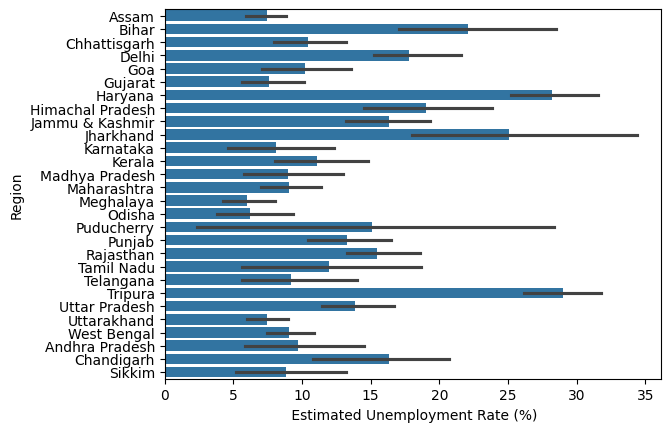

In [624]:
sns.barplot(y='Region', x=' Estimated Unemployment Rate (%)', data=df)

<Axes: xlabel=' Estimated Labour Participation Rate (%)', ylabel='Region'>

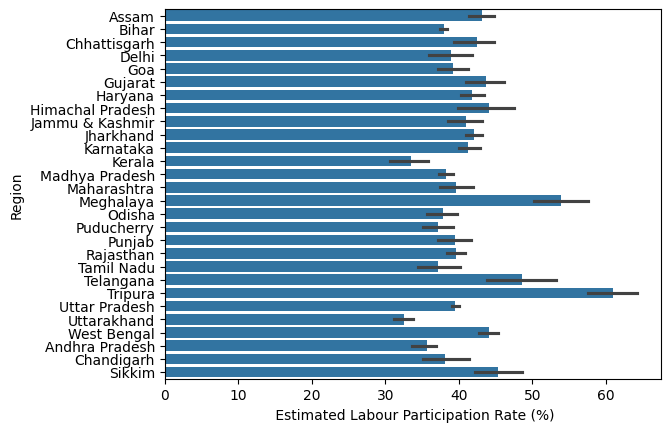

In [625]:
sns.barplot(y='Region', x=' Estimated Labour Participation Rate (%)', data=df)

In [626]:
df.groupby('Region')[' Estimated Labour Participation Rate (%)'].max().sort_index()

,Estimated Labour Participation Rate (%)
Region,
Andhra Pradesh,38.61
Assam,50.00
Bihar,39.80
Chandigarh,42.94
Chhattisgarh,47.39
Delhi,48.09
Goa,45.36
Gujarat,54.07
Haryana,49.85


<Axes: xlabel=' Estimated Unemployment Rate (%)', ylabel='Region'>

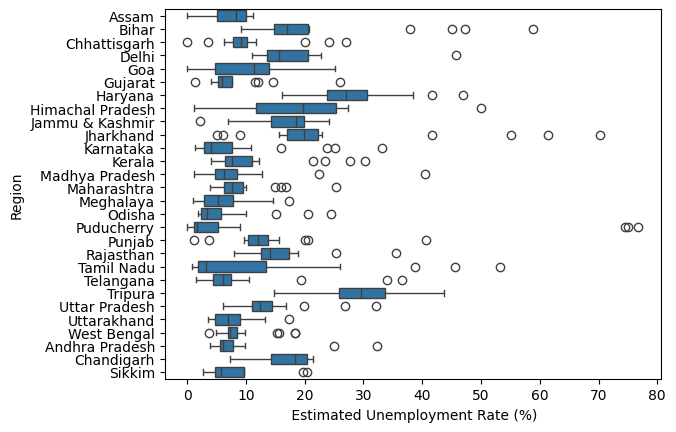

In [627]:
sns.boxplot(y='Region', x=' Estimated Unemployment Rate (%)', data=df)

<Axes: xlabel=' Estimated Unemployment Rate (%)'>

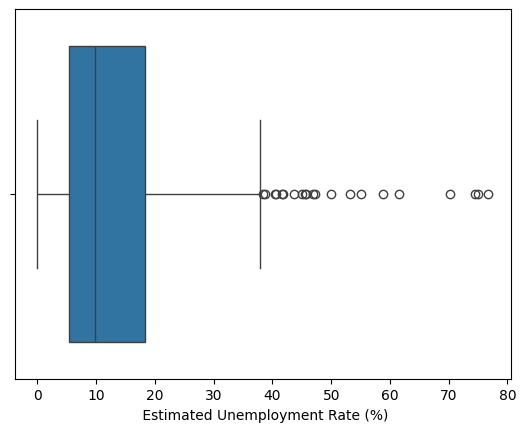

In [628]:
sns.boxplot( x=' Estimated Unemployment Rate (%)', data=df)

In [629]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Year-month', 'yoy_change', 'yoy_percent_change'],
      dtype='object')

***rural–urban gap***

In [630]:
df1 = df.groupby('Area')[' Estimated Employed'].count()

In [631]:
r_u_gap = df1[0] - df1[1]

In [632]:
print(r_u_gap)

-231


In [633]:
r_u_gap_per = (df1[0] - df1[1])/df1 *100

In [634]:
print(r_u_gap_per)

Area
Rural   -167.391304
Urban    -62.601626
Name:  Estimated Employed, dtype: float64


In [635]:
df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean()

,Estimated Unemployment Rate (%)
Area,
Rural,13.982971
Urban,13.185068


In [636]:
df2 = df.groupby('Area')[' Estimated Unemployment Rate (%)'].count()

In [637]:
gap =df2[1] - df2[0]

In [638]:
gap

np.int64(231)

***YoY Change in unemployment rate per region***

---



In [639]:
df['yoy_change'] = df.groupby('Region')[' Estimated Unemployment Rate (%)'].diff()

In [640]:
df['yoy_percent_change'] = df['yoy_change'].pct_change() * 100

In [641]:
df['yoy_percent_change']

,yoy_percent_change
2,NaN
3,NaN
4,-267.201426
6,0.000000
7,-105.117271
...,...
531,833.333333
532,-414.285714
533,-1118.181818
534,-104.575893


# ***EDA : Exploratory Data Analysis***

***Line charts of unemployment rate over time for select states (e.g., Delhi,
Maharashtra)***

In [642]:
df_selected = df[df['Region'].isin(['Delhi', 'Maharashtra'])]

In [643]:
df_selected = df_selected.sort_values(by=' Date')

<Axes: xlabel=' Date', ylabel=' Estimated Unemployment Rate (%)'>

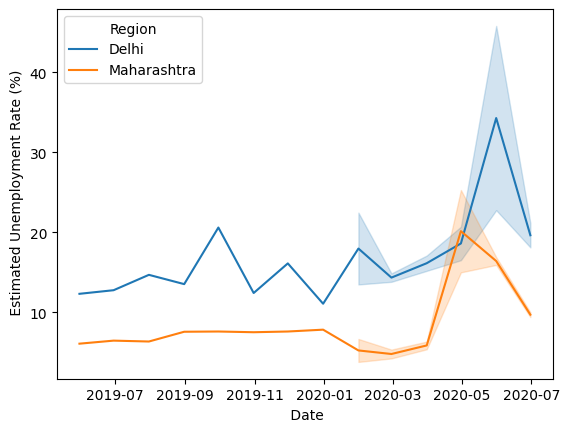

In [644]:
sns.lineplot(x = ' Date' , y = ' Estimated Unemployment Rate (%)', hue = 'Region',data = df_selected)

***Bar charts comparing rural vs urban unemployment rates***

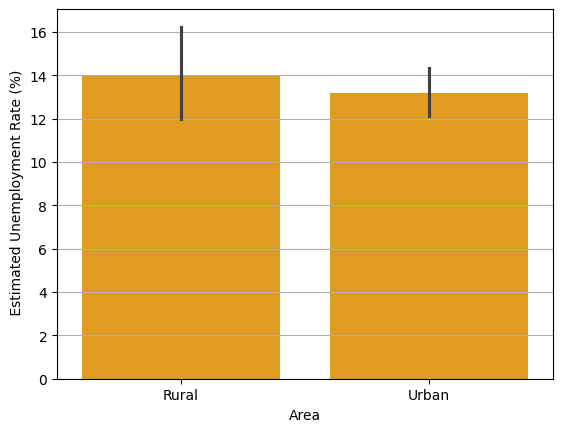

In [645]:
sns.barplot(x='Area', y=' Estimated Unemployment Rate (%)',color = 'orange', data=df)
plt.grid(axis = 'y')

***Heatmap: region × year showing unemployment intensity:***

<Axes: xlabel='Year-month', ylabel='Region'>

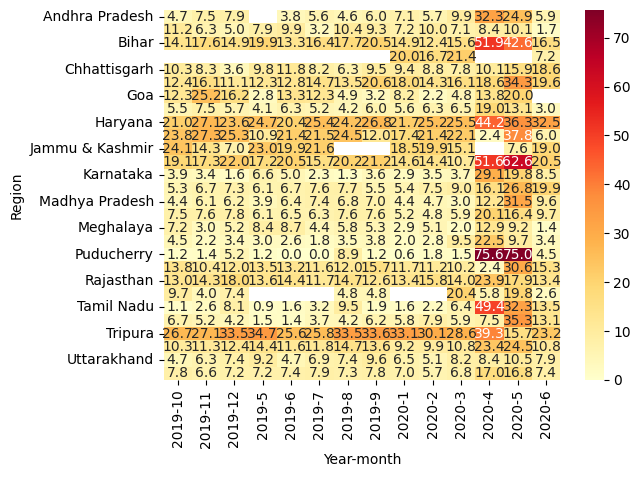

In [646]:
sns.heatmap(df.pivot_table(index='Region', columns='Year-month', values=' Estimated Unemployment Rate (%)'),cmap="YlOrRd",fmt = '.1f' ,annot=True)

***box plots: participation rate distribution across regions***

<Axes: xlabel=' Estimated Labour Participation Rate (%)', ylabel='Region'>

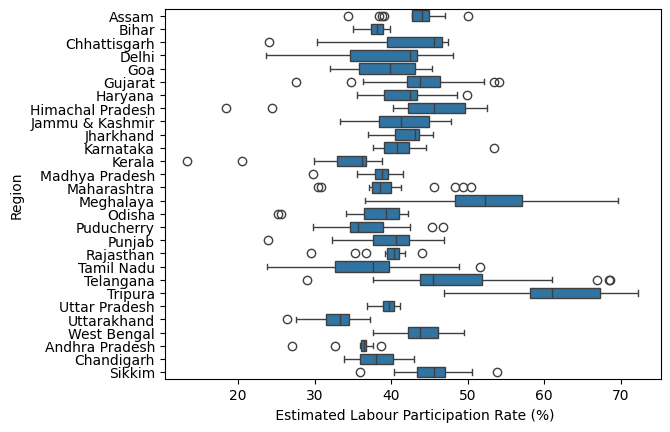

In [647]:
sns.boxplot(y='Region', x=' Estimated Labour Participation Rate (%)', data=df)

***Time series of employment and participation rates***

<Axes: xlabel=' Date', ylabel=' Estimated Employed'>

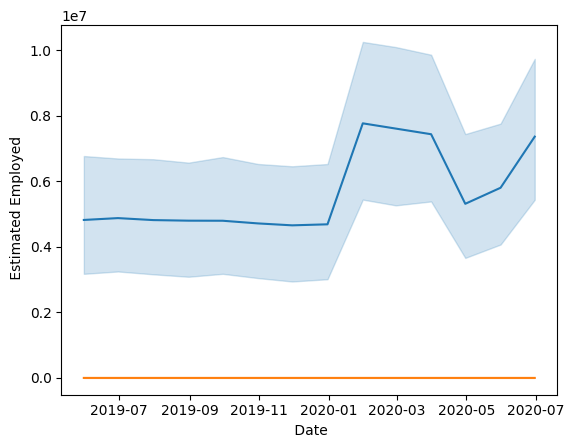

In [648]:
sns.lineplot(x=' Date', y=' Estimated Employed', data=df)
sns.lineplot(x=' Date', y=' Estimated Labour Participation Rate (%)', data=df)

# ***DESCRIPTIVE STATISTICS***

***Mean, median, standard deviation for unemployment and participation***

In [649]:
df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

,Estimated Unemployment Rate (%)
Region,
Andhra Pradesh,9.684615
Assam,7.434706
Bihar,22.095000
Chandigarh,16.330000
Chhattisgarh,10.440000
Delhi,17.765500
Goa,10.199375
Gujarat,7.566000
Haryana,28.223500


In [650]:
df.groupby('Region')[' Estimated Unemployment Rate (%)'].median()

,Estimated Unemployment Rate (%)
Region,
Andhra Pradesh,6.010
Assam,8.370
Bihar,17.015
Chandigarh,18.335
Chhattisgarh,9.235
Delhi,15.645
Goa,11.340
Gujarat,5.890
Haryana,26.950


In [651]:
df.groupby('Region')[' Estimated Unemployment Rate (%)'].std()

,Estimated Unemployment Rate (%)
Region,
Andhra Pradesh,8.678059
Assam,3.285792
Bihar,13.736190
Chandigarh,6.392355
Chhattisgarh,6.387851
Delhi,7.502711
Goa,7.005351
Gujarat,5.267373
Haryana,7.565236


***Compute coefficient of variation by region***

In [652]:
stats_by_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].agg(['mean', 'std'])
stats_by_region['CV (%)'] = (stats_by_region['std'] / stats_by_region['mean']) * 100

stats_by_region_sorted = stats_by_region.sort_values(by='CV (%)', ascending=False)

print("\nCoefficient of Variation by Region (sorted):\n")
print(stats_by_region_sorted)


Coefficient of Variation by Region (sorted):

                       mean        std      CV (%)
Region                                            
Puducherry        15.117059  28.861005  190.916802
Tamil Nadu        11.989500  16.398013  136.769783
Karnataka          8.133500   9.088008  111.735519
Telangana          9.203000   9.675939  105.138963
Odisha             6.228500   6.522085  104.713574
Madhya Pradesh     8.946000   8.750424   97.813816
Andhra Pradesh     9.684615   8.678059   89.606647
Sikkim             8.813333   6.709234   76.125957
Meghalaya          5.967895   4.309390   72.209546
Jharkhand         25.093000  17.804801   70.955252
Kerala            11.115500   7.863464   70.743234
Gujarat            7.566000   5.267373   69.618988
Goa               10.199375   7.005351   68.684118
Bihar             22.095000  13.736190   62.168770
Chhattisgarh      10.440000   6.387851   61.186314
Punjab            13.240500   7.789666   58.832110
Himachal Pradesh  19.038000  11.181

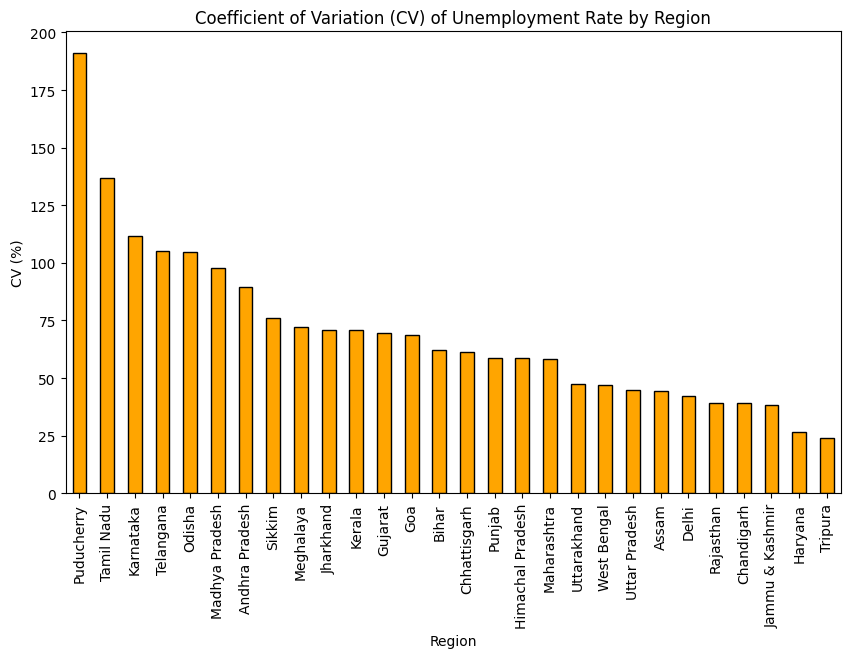

In [653]:
plt.figure(figsize=(10, 6))
stats_by_region_sorted['CV (%)'].plot(kind='bar', color='orange', edgecolor='black')
plt.title("Coefficient of Variation (CV) of Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("CV (%)")
plt.xticks(rotation=90)
plt.show()

***Rank top 3 states with highest variability in unemployment***

In [654]:
stats_by_region.sort_values(by='std', ascending=False).head(3)

,mean,std,CV (%)
Region,,,
Puducherry,15.117059,28.861005,190.916802
Jharkhand,25.093000,17.804801,70.955252
Tamil Nadu,11.989500,16.398013,136.769783


***Identify months/years with extreme peaks or dips aka outliers (IQR method)***

In [655]:
Q1 = df[' Estimated Unemployment Rate (%)'].quantile(0.25)
Q3 = df[' Estimated Unemployment Rate (%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [656]:
outliers_df =df[
    (df[' Estimated Unemployment Rate (%)'] < lower_bound) |
    (df[' Estimated Unemployment Rate (%)'] > upper_bound)
].sort_values(by=' Estimated Unemployment Rate (%)')

In [657]:
outliers_df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year-month,yoy_change,yoy_percent_change
277,Haryana,2020-05-31,Monthly,38.46,2013083.0,38.27,Urban,2020-5,-8.43,-142.683544
128,Tamil Nadu,2020-05-31,Monthly,38.73,5768342.0,28.60,Rural,2020-5,-14.46,-130.877643
357,Madhya Pradesh,2020-05-31,Monthly,40.49,3879934.0,35.49,Urban,2020-5,28.55,299.859944
114,Punjab,2020-05-31,Monthly,40.59,3727366.0,41.14,Rural,2020-5,36.90,-641.055718
42,Haryana,2020-04-30,Monthly,41.61,4041050.0,49.85,Rural,2020-4,17.69,-640.978593
60,Jharkhand,2020-04-30,Monthly,41.72,4280434.0,36.92,Rural,2020-4,36.71,-1006.419753
141,Tripura,2020-04-30,Monthly,43.64,675083.0,52.63,Rural,2020-4,12.03,123.191095
9,Bihar,2020-04-30,Monthly,45.09,14645275.0,38.63,Rural,2020-4,29.70,413.840830
463,Tamil Nadu,2020-04-30,Monthly,45.55,4632967.0,26.17,Urban,2020-4,39.09,1140.952381
237,Delhi,2020-05-31,Monthly,45.78,2343783.0,28.28,Urban,2020-5,29.27,-5146.551724


***• Calculate correlation between unemployment rate and participation rate***

In [658]:
df[ ' Estimated Unemployment Rate (%)'].corr(df[' Estimated Labour Participation Rate (%)'])

np.float64(0.05341681041682404)

In [659]:
conn = sqlite3.connect("unemployment_data.db")  # creates a file-based DB

#Write the DataFrame to SQLite as a table
df.to_sql("unemployment", conn, if_exists="replace", index=False)
query = "SELECT * FROM unemployment LIMIT 5;"
preview_df = pd.read_sql_query(query, conn)

print(preview_df)
conn.close()

  Region                 Date  Frequency   Estimated Unemployment Rate (%)  \
0  Assam  2020-03-31 00:00:00    Monthly                              3.77   
1  Assam  2020-05-31 00:00:00    Monthly                              9.38   
2  Assam  2020-06-30 00:00:00    Monthly                              0.00   
3  Bihar  2020-01-31 00:00:00    Monthly                              9.13   
4  Bihar  2020-02-29 00:00:00    Monthly                              9.61   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  \
0            9878742.0                                     47.05  Rural   
1            9926176.0                                     50.00  Rural   
2            7544937.0                                     34.38  Rural   
3           23409006.0                                     37.54  Rural   
4           23168192.0                                     37.28  Rural   

  Year-month  yoy_change  yoy_percent_change  
0     2020-3         NaN         

In [660]:
df.to_csv('Unemployment.csv', index=False)

# ***SQL Operations***




In [661]:
#1. Import cleaned data into SQLite or pandasql environment.
#-- SELECT Region, AVG(C) AS avg_unemployment_rate FROM Unemployed_Dataset
#-- WHERE Year BETWEEN 2020 AND 2021

#2.  Top 5 regions with highest average unemployment rate during 2020–21
#-- GROUP BY Region
#-- ORDER BY avg_unemployment_rate DESC LIMIT 5;

#3.  Compare participation rates between rural and urban regions
#-- SELECT Region, AVG(Estimated_Labour_Participation_Rate) AS avg_participation_rate
#-- FROM Unemployed_Dataset
#-- GROUP BY Region;

#4. Query regional unemployment trends over years
#-- SELECT Region, Year, Estimated_Unemployment_Rate FROM Unemployed_Dataset
#-- ORDER By Region, Year

#5 identify regions with greatest improvement post-2020
#-- Identify regions with greatest improvement post-2020
#--SELECT Region FROM Unemployed_Dataset WHERE max(Estimated_Employed)


# ***Tableau Dashboard***

Saving Screenshot 2025-09-16 141107.png to Screenshot 2025-09-16 141107 (8).png


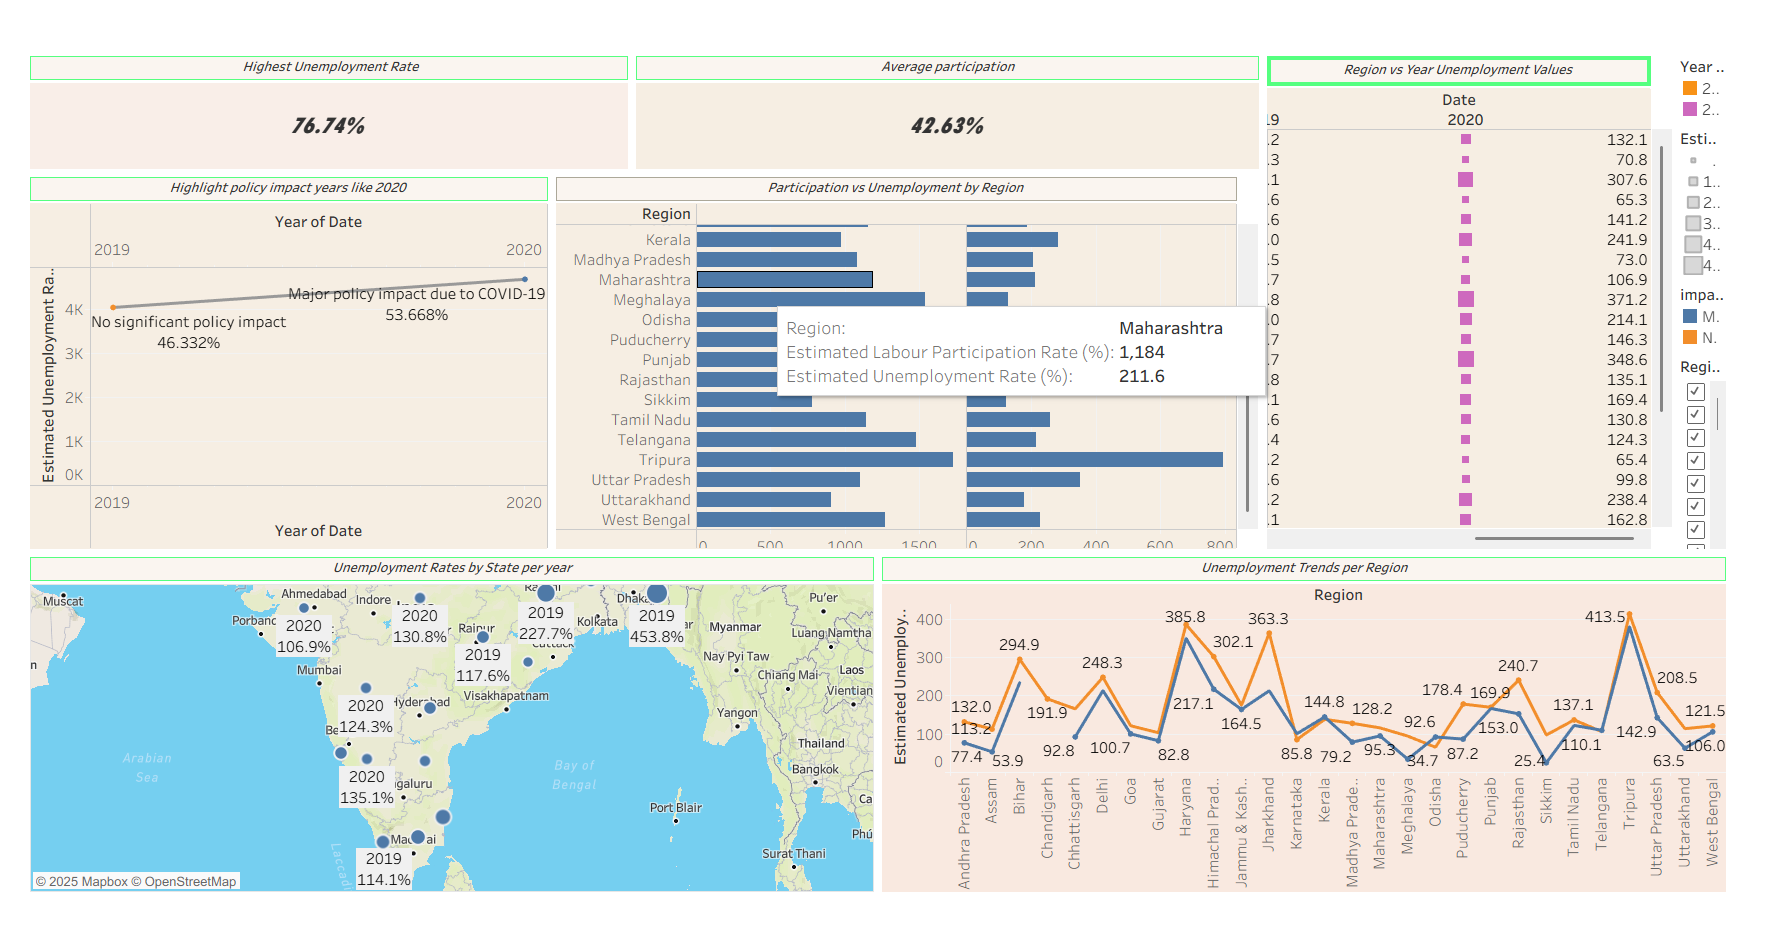

In [662]:
from google.colab import files

from IPython.display import Image

uploaded = files.upload()
Image(list(uploaded.keys())[0])

# ***Machine Learning***

Regression: Forecast future unemployment rate (e.g., for 2022–2023) using features such as:
o Current & previous rates, participation rate, region type

In [663]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [664]:
df['Area'] = df['Area'].map({ 'Rural':0,'Urban':1})


In [665]:
df = df.dropna(subset=' Estimated Unemployment Rate (%)')
df = df.dropna(subset=['Area',' Estimated Employed', ' Estimated Labour Participation Rate (%)'])


In [666]:
x = df[['Area']]
y = df[' Estimated Unemployment Rate (%)']

In [667]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [668]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [669]:
y_pred = model.predict(x_test)

In [670]:
y_pred_rural = model.predict([[0]])
y_pred_urban = model.predict([[1]])

print(f'Predicted Unemployment Rate for Rural Area: {y_pred_rural[0]:.2f}%')
print(f'Predicted Unemployment Rate for Urban Area: {y_pred_urban[0]:.2f}%')

Predicted Unemployment Rate for Rural Area: 14.54%
Predicted Unemployment Rate for Urban Area: 13.10%


In [671]:
x = df[['Area',' Estimated Labour Participation Rate (%)']]
y = df[' Estimated Unemployment Rate (%)']

In [672]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [673]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [674]:
y_pred = model.predict(x_test)

In [675]:
y_pred_rural = model.predict([[0, 10]])
y_pred_urban = model.predict([[1, 20]])
print(f'Predicted Unemployment Rate for Rural Area: {y_pred_rural[0]:.2f}%')
print(f'Predicted Unemployment Rate for Urban Area: {y_pred_urban[0]:.2f}%')

Predicted Unemployment Rate for Rural Area: 10.96%
Predicted Unemployment Rate for Urban Area: 10.83%


In [676]:
df['Date_Year'] = pd.to_datetime(df[' Date']).dt.year

In [677]:
x = df[['Date_Year','Area',' Estimated Labour Participation Rate (%)']]
y = df[' Estimated Unemployment Rate (%)']

In [678]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [679]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [680]:
y_pred = model.predict(x_test)

In [681]:
y_pred_rural = model.predict([[2022,0, 10]])
y_pred_urban = model.predict([[2020,1, 20]])
print(f'Predicted Unemployment Rate for Rural Area: {y_pred_rural[0]:.2f}%')
print(f'Predicted Unemployment Rate for Urban Area: {y_pred_urban[0]:.2f}%')


Predicted Unemployment Rate for Rural Area: 21.89%
Predicted Unemployment Rate for Urban Area: 13.17%


Classification Task
• Categorize unemployment rate into buckets: Low (<5%), Medium (5–10%), High
(>10%)

In [682]:
dfc = df.corr(numeric_only=True)
dfc

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,yoy_change,yoy_percent_change,Date_Year
Estimated Unemployment Rate (%),1.000000,-0.190976,0.053417,-0.030190,0.512533,0.066464,0.203302
Estimated Employed,-0.190976,1.000000,-0.021772,-0.359392,-0.030634,-0.030369,0.152569
Estimated Labour Participation Rate (%),0.053417,-0.021772,1.000000,-0.122345,0.034877,-0.043290,-0.095250
Area,-0.030190,-0.359392,-0.122345,1.000000,-0.064913,0.045716,-0.514230
yoy_change,0.512533,-0.030634,0.034877,-0.064913,1.000000,-0.004315,0.052577
yoy_percent_change,0.066464,-0.030369,-0.043290,0.045716,-0.004315,1.000000,0.001734
Date_Year,0.203302,0.152569,-0.095250,-0.514230,0.052577,0.001734,1.000000


In [683]:
from sklearn.linear_model import LogisticRegression

In [691]:
def categorize_unemployment(rate):
    if rate < 5:
        return 'Low'
    elif 5 <= rate <= 10:
        return 'Medium'
    else:
        return 'High'


In [695]:
df['Unemployment_Category'] = df[ ' Estimated Unemployment Rate (%)'].apply(categorize_unemployment)

df['Unemployment_Category'] = df['Unemployment_Category'].map({'Low':1, 'Medium':2, 'High':3})


In [697]:
df.dropna(subset = 'Area', inplace = True)


In [699]:
df['Region'].unique()


array(['Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Meghalaya', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh', 'Chandigarh',
       'Sikkim'], dtype=object)

In [700]:
region_zone_map = {
    # North (1)
    'Delhi': 1,
    'Haryana': 1,
    'Himachal Pradesh': 1,
    'Jammu & Kashmir': 1,
    'Punjab': 1,
    'Uttarakhand': 1,
    'Uttar Pradesh': 1,
    'Chandigarh': 1,

    # East (2)
    'Bihar': 2,
    'Jharkhand': 2,
    'Odisha': 2,
    'Sikkim': 2,
    'West Bengal': 2,
    'Assam': 2,
    'Meghalaya': 2,
    'Tripura': 2,

    # South (3)
    'Andhra Pradesh': 3,
    'Telangana': 3,
    'Tamil Nadu': 3,
    'Karnataka': 3,
    'Kerala': 3,
    'Puducherry': 3,

    # West (4)
    'Rajasthan': 4,
    'Gujarat': 4,
    'Goa': 4,
    'Maharashtra': 4,
    'Madhya Pradesh': 4,
    'Chhattisgarh': 4,
}



In [701]:

df['Region_Zone'] = df['Region'].map(region_zone_map)

unmapped = df[df['Region_Zone'].isnull()]['Region'].unique()
print("Unmapped regions:", unmapped)



Unmapped regions: []


In [703]:
df['Region_Zone']


,Region_Zone
2,2
3,2
4,2
6,2
7,2
...,...
531,2
532,2
533,2
534,2


<Axes: >

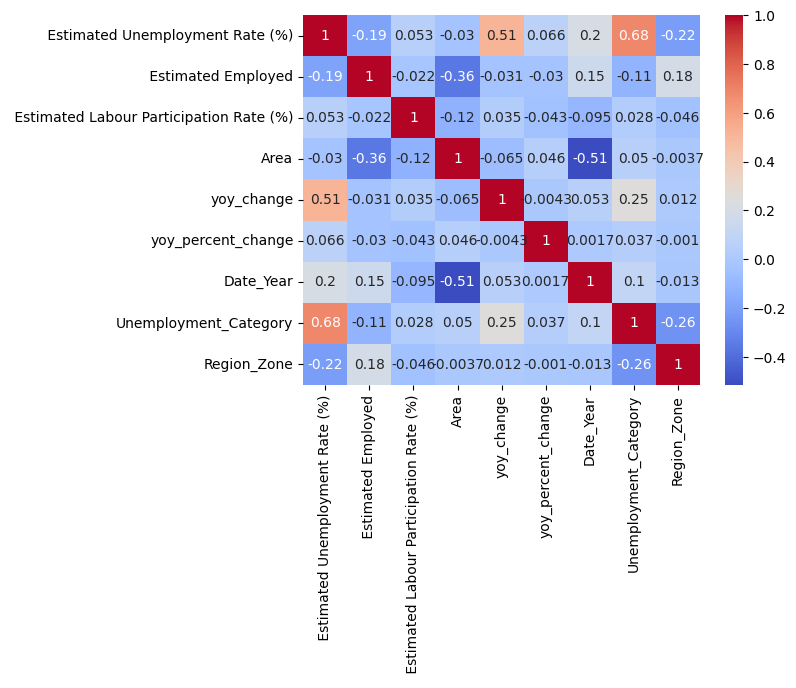

In [704]:
new_corr = df.corr(numeric_only=True)
sns.heatmap(new_corr, cmap='coolwarm', annot = True)



In [708]:
X = df[['Date_Year','Area','Region_Zone']]
Y = df['Unemployment_Category']


In [707]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year-month,yoy_change,yoy_percent_change,Date_Year,Unemployment_Category,Region_Zone
2,Assam,2020-03-31,Monthly,3.77,9878742.0,47.05,0,2020-3,NaN,NaN,2020,1,2
3,Assam,2020-05-31,Monthly,9.38,9926176.0,50.00,0,2020-5,5.61,NaN,2020,2,2
4,Assam,2020-06-30,Monthly,0.00,7544937.0,34.38,0,2020-6,-9.38,-267.201426,2020,1,2
6,Bihar,2020-01-31,Monthly,9.13,23409006.0,37.54,0,2020-1,NaN,0.000000,2020,2,2
7,Bihar,2020-02-29,Monthly,9.61,23168192.0,37.28,0,2020-2,0.48,-105.117271,2020,2,2


In [709]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [710]:
model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

In [711]:
y_pred = model.predict(x_test)


In [712]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)


Accuracy:  0.5163398692810458
